# CHN双线性插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from maplot import map_plot_surface, map_plot_surface_sub

inPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\CHN_year\\"
outPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\CHN_year_bilinear\\"

H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectl

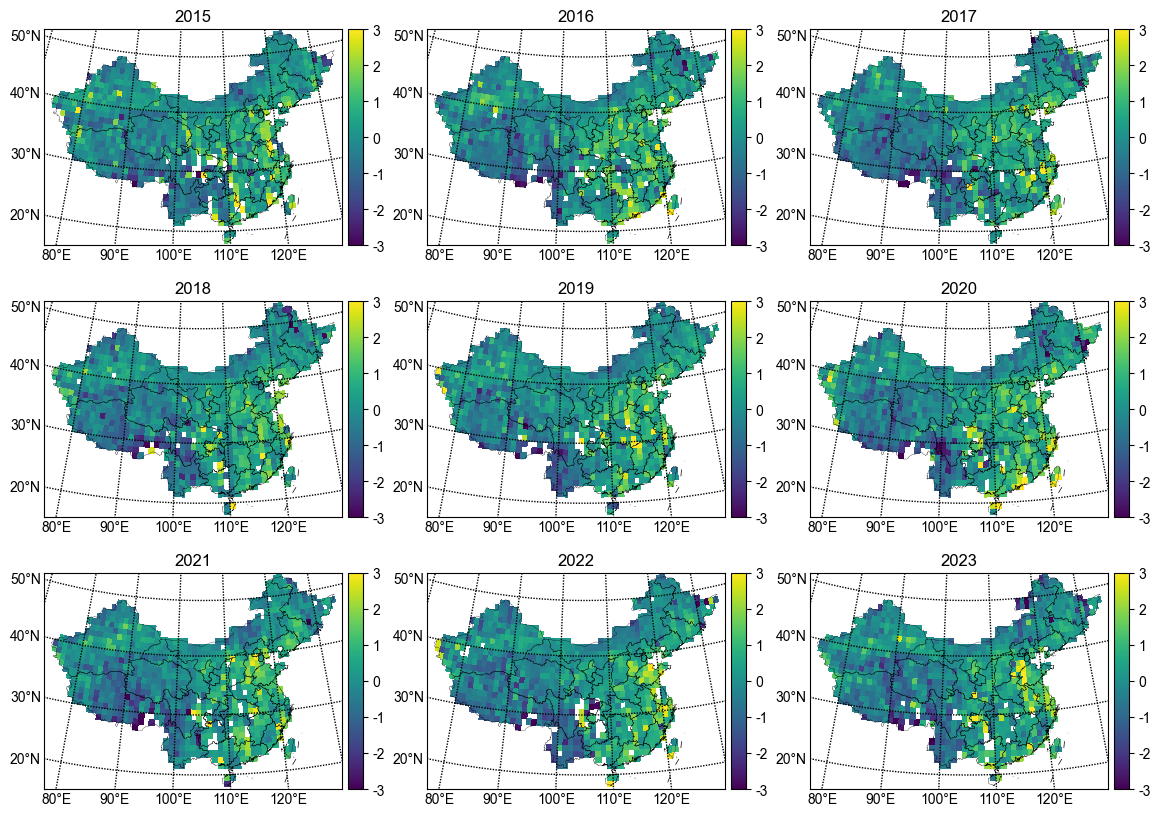

In [2]:
plt.figure(figsize=(14, 10))
sub = 331
for year in range(2015, 2024):
    plt.subplot(sub)
    map_plot_surface_sub(np.load(inPath + f"MappingXCO2_{year}.npy"), "viridis", -3.0, 3.0, f"{year}")
    sub += 1

plt.show()

In [5]:
china = np.load("china_area.npy") > 0.0

for year in range(2015, 2024):
    data = np.load(inPath + f"MappingXCO2_{year}.npy")
    print(f"Process {year}:")
    
    nulls = np.argwhere(np.logical_and(np.isnan(data), china))  # shape: (n, 2)，n为空缺值数量，两个数为坐标
    
    for x, y in nulls:
        data[x, y] = np.nanmean(data[(x,x,x+1,x-1), (y+1,y-1,y,y)])
        print(f"Cell at {y-179.5}°E{x-89.5}°N is filled with {data[x, y]}")
        
    np.save(outPath + f"MappingXCO2_{year}.npy", data)
    print("Process completed.\n")

Process 2015:
Cell at 112.5°E22.5°N is filled with 2.367085079131639
Cell at 106.5°E23.5°N is filled with 0.49865880921781447
Cell at 111.5°E23.5°N is filled with 2.4207408661526197
Cell at 106.5°E24.5°N is filled with 0.06598374413988246
Cell at 112.5°E24.5°N is filled with 2.375246553195263
Cell at 106.5°E25.5°N is filled with -0.35011705922474656
Cell at 118.5°E25.5°N is filled with 1.1413955276273737
Cell at 98.5°E27.5°N is filled with -1.2365912874779577
Cell at 110.5°E27.5°N is filled with 0.7691431770850511
Cell at 113.5°E27.5°N is filled with 0.37113858814634143
Cell at 96.5°E28.5°N is filled with 0.11216057226971754
Cell at 105.5°E28.5°N is filled with 0.3543896167087702
Cell at 108.5°E28.5°N is filled with -0.5940565816226893
Cell at 116.5°E28.5°N is filled with 0.23744189083099299
Cell at 103.5°E29.5°N is filled with -0.714542436104622
Cell at 103.5°E30.5°N is filled with -0.7262894811104585
Cell at 104.5°E30.5°N is filled with -1.710268349635679
Cell at 109.5°E30.5°N is fil

H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectl

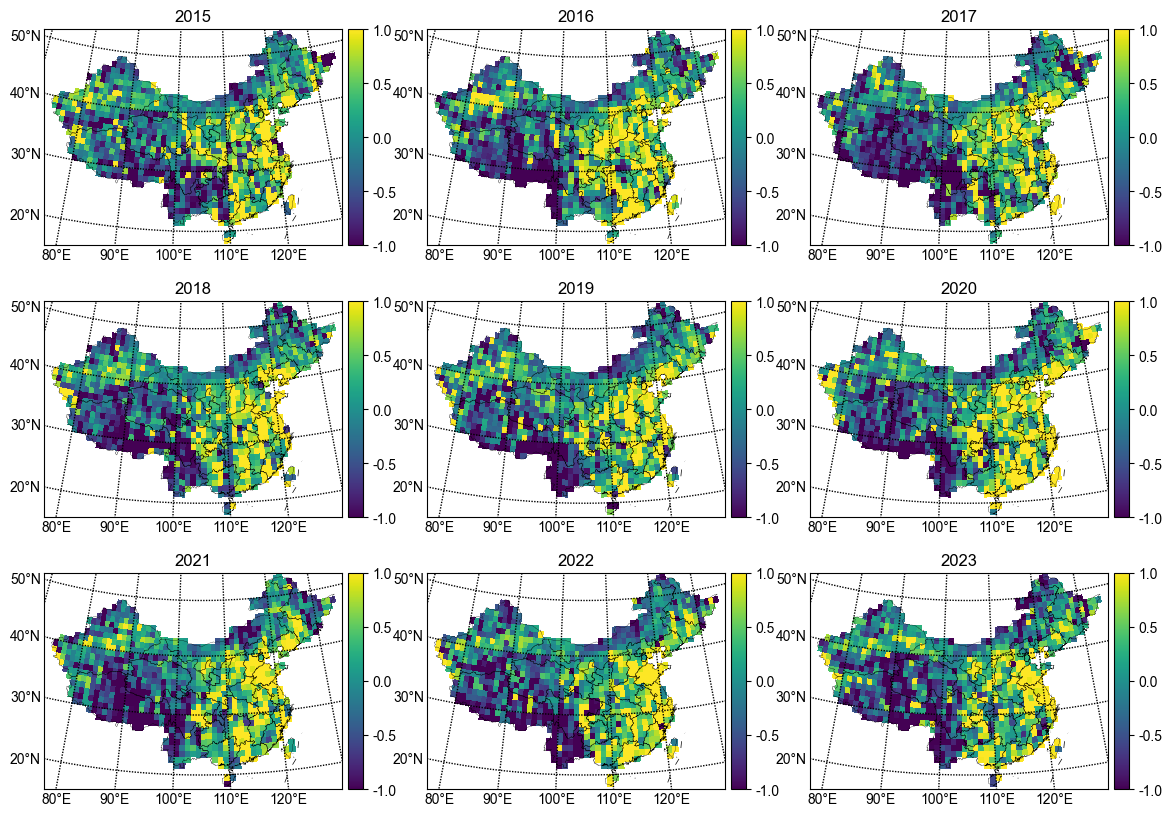

In [5]:
plt.figure(figsize=(14, 10))
sub = 331
for year in range(2015, 2024):
    plt.subplot(sub)
    map_plot_surface_sub(np.load(outPath + f"MappingXCO2_{year}.npy"), "viridis", -1.0, 1.0, f"{year}")
    sub += 1

plt.show()